In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pyart
import cartopy.crs as ccrs
from pyart.testing import get_test_data
import os


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



In [2]:
day = '01/'
path = 'Data/'

In [3]:
data = [path + day + fileName for fileName in os.listdir(path + day)]
data.sort()

In [4]:
# one_prt = []
# two_prt = []

# for i in range(len(data)):  
#     if pyart.io.read(data[i]).instrument_parameters['prt_mode']['data'][0].decode() == 'fixed':
#        one_prt.append(data[i])
#     else: two_prt.append(data[i])

# print(one_prt[:3])
# print(two_prt[:3])

In [5]:
firstDir = path + day + '1_prt/'
secondDir = path + day + '2_prt/'

# os.mkdir(firstDir)
# os.mkdir(secondDir)

# for i in one_prt:
#     os.rename(i, firstDir + i.split('/')[-1])
# for i in two_prt:
#     os.rename(i, secondDir + i.split('/')[-1])

In [6]:
one_prt = [firstDir + fileName for fileName in os.listdir(firstDir)]
two_prt = [secondDir + fileName for fileName in os.listdir(secondDir)]

In [7]:
# Read in a sample file
radar = pyart.io.read(one_prt[0])
radar.nsweeps

4

In [8]:
radar1 = pyart.io.read(two_prt[1])
radar1.nsweeps

8

In [9]:
radar.__dir__()

['time',
 'range',
 'fields',
 'metadata',
 'scan_type',
 'latitude',
 'longitude',
 'altitude',
 'altitude_agl',
 'sweep_number',
 'sweep_mode',
 'fixed_angle',
 'sweep_start_ray_index',
 'sweep_end_ray_index',
 'target_scan_rate',
 'rays_are_indexed',
 'ray_angle_res',
 'azimuth',
 'elevation',
 'scan_rate',
 'antenna_transition',
 'rotation',
 'tilt',
 'roll',
 'drift',
 'heading',
 'pitch',
 'georefs_applied',
 'instrument_parameters',
 'radar_calibration',
 'ngates',
 'nrays',
 'nsweeps',
 'projection',
 'rays_per_sweep',
 'gate_x',
 'gate_y',
 'gate_z',
 'gate_longitude',
 'gate_latitude',
 'gate_altitude',
 '__module__',
 '__doc__',
 '__init__',
 '__getstate__',
 '__setstate__',
 'init_rays_per_sweep',
 'init_gate_x_y_z',
 'init_gate_longitude_latitude',
 'init_gate_altitude',
 '_check_sweep_in_range',
 'check_field_exists',
 'iter_start',
 'iter_end',
 'iter_start_end',
 'iter_slice',
 'iter_field',
 'iter_azimuth',
 'iter_elevation',
 'get_start',
 'get_end',
 'get_start_end',

In [10]:
radar.ngates

500

In [11]:
radar.nsweeps

4

In [12]:
# radar = pyart.io.read(filenames[0])
# len(radar.elevation["data"].tolist())

radar.sweep_start_ray_index

{'long_name': 'Index of first ray in sweep, 0-based',
 'units': 'count',
 'data': array([   0,  309,  669, 1029], dtype=int32)}

In [13]:
radar.sweep_end_ray_index

{'long_name': 'Index of last ray in sweep, 0-based',
 'units': 'count',
 'data': array([ 308,  668, 1028, 1388], dtype=int32)}

In [14]:
len(radar.fields['reflectivity']['data'].data) == radar.nrays

True

In [15]:
len(radar.fields['reflectivity']['data'].data[0]) == radar.ngates

True

In [16]:
radar.fields['reflectivity']['data'].data

array([[-327.68, -327.68, -327.68, ..., -327.68, -327.68, -327.68],
       [-327.68, -327.68, -327.68, ..., -327.68, -327.68, -327.68],
       [-327.68, -327.68, -327.68, ..., -327.68, -327.68, -327.68],
       ...,
       [-327.68, -327.68, -327.68, ..., -327.68, -327.68, -327.68],
       [-327.68, -327.68, -327.68, ..., -327.68, -327.68, -327.68],
       [-327.68, -327.68, -327.68, ..., -327.68, -327.68, -327.68]],
      dtype=float32)

In [17]:
radar.get_gate_lat_lon_alt(0)

(array([[10.65961 , 10.665006, 10.670401, ..., 13.339337, 13.344723,
         13.350109],
        [10.65961 , 10.665005, 10.6704  , ..., 13.338839, 13.344224,
         13.349608],
        [10.65961 , 10.665003, 10.670396, ..., 13.337842, 13.343225,
         13.348608],
        ...,
        [10.65961 , 10.664999, 10.670387, ..., 13.335935, 13.341313,
         13.346692],
        [10.65961 , 10.665003, 10.670396, ..., 13.337852, 13.343234,
         13.348617],
        [10.65961 , 10.665005, 10.6704  , ..., 13.339046, 13.34443 ,
         13.349817]], dtype=float32),
 array([[106.728325, 106.72836 , 106.728386, ..., 106.744026, 106.744064,
         106.744095],
        [106.728325, 106.72843 , 106.728546, ..., 106.78375 , 106.78386 ,
         106.78398 ],
        [106.728325, 106.72851 , 106.72869 , ..., 106.82134 , 106.82153 ,
         106.82173 ],
        ...,
        [106.728325, 106.72804 , 106.72777 , ..., 106.5877  , 106.58741 ,
         106.587135],
        [106.728325, 106.72814 , 

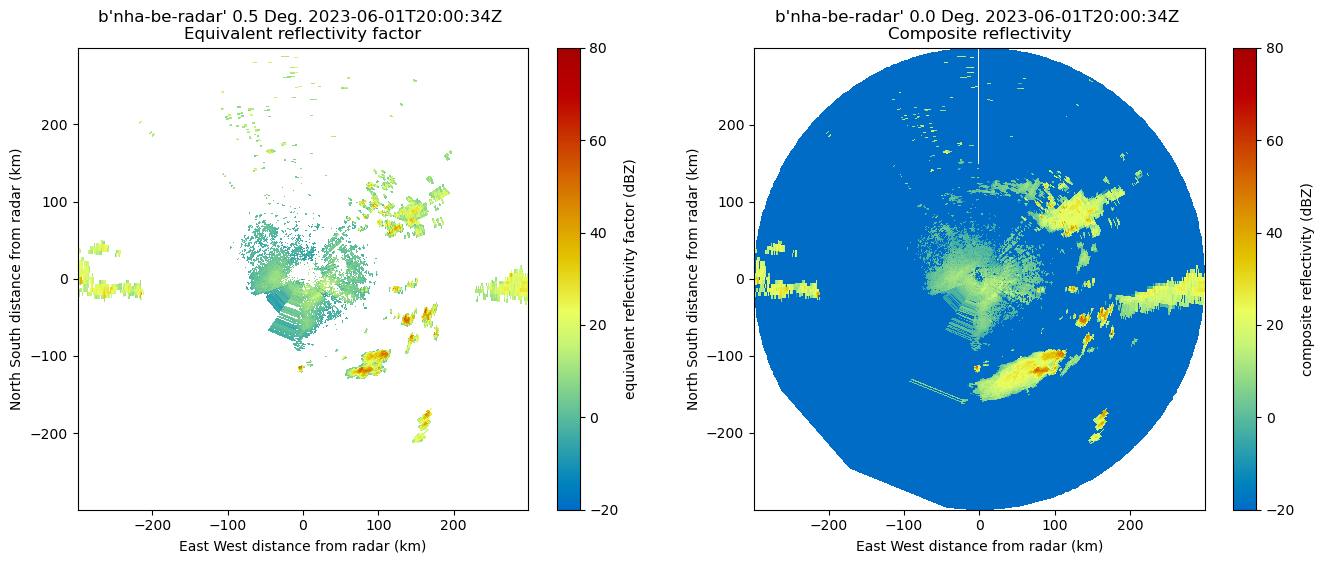

In [18]:

# Configure a gatefilter to filter out copolar correlation coefficient values > 0.9
gatefilter = pyart.filters.GateFilter(radar)
gatefilter.exclude_transition()
# gatefilter.exclude_below("copol_coeff", 0.9)

# Calculate composite reflectivity, or the maximum reflectivity across all elevation levels
compz = pyart.retrieve.composite_reflectivity(
    radar, field="reflectivity", gatefilter=gatefilter
)

# Plot the original reflectivity field and the composite field
fig = plt.figure(figsize=(16, 6))
ax = plt.subplot(121)
display = pyart.graph.RadarDisplay(radar)
display.plot("reflectivity", ax=ax, vmin=-20, vmax=80)

ax2 = plt.subplot(122)
composite_display = pyart.graph.RadarDisplay(compz)
composite_display.plot(
    "composite_reflectivity", ax=ax2, vmin=-20, vmax=80, cmap="pyart_HomeyerRainbow"
)


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.animation import FuncAnimation, PillowWriter

def get_gate_set(sweep_num, radar):
    gates = radar.get_gate_x_y_z(sweep_num)

    gate_set = []
    for i in range(len(gates[0])):
        for j in range(len(gates[0][i])):
            gate_set += [
                    [
                        gates[0][i][j],     #   X
                        gates[1][i][j],     #   Y
                        gates[2][i][j]      #   Z
                    ]
                ]
    gate_set = np.array(gate_set)
    return gate_set

In [20]:
def get_gate_reflectivity(sweep_num, radar):
    start_ray_index = radar.sweep_start_ray_index['data'][sweep_num]
    end_ray_index = radar.sweep_end_ray_index['data'][sweep_num]

    return radar.fields['reflectivity']['data'][start_ray_index : end_ray_index+1].flatten()

In [21]:
sweep_gate_set = [get_gate_set(sweep_num, radar) for sweep_num in range(radar.nsweeps)]
sweep_gate_set

[array([[ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        [ 3.4225488e+00,  5.9996790e+02,  4.0000000e+00],
        [ 6.8450918e+00,  1.1999348e+03,  1.0000000e+01],
        ...,
        [-4.8135166e+03,  2.9793994e+05,  7.7460000e+03],
        [-4.8231914e+03,  2.9853875e+05,  7.7720000e+03],
        [-4.8328657e+03,  2.9913759e+05,  7.7980000e+03]], dtype=float32),
 array([[ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        [ 2.0989242e+00,  5.9981537e+02,  1.4000000e+01],
        [ 4.1978412e+00,  1.1996287e+03,  2.9000000e+01],
        ...,
        [-4.8380005e+03,  2.9768894e+05,  1.2599000e+04],
        [-4.8477188e+03,  2.9828691e+05,  1.2635000e+04],
        [-4.8574360e+03,  2.9888481e+05,  1.2671000e+04]], dtype=float32),
 array([[ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        [ 3.9367952e+00,  5.9944055e+02,  2.5000000e+01],
        [ 7.8735666e+00,  1.1988774e+03,  5.1000000e+01],
        ...,
        [-4.7322896e+03,  2.9731856e+05,  1.8004000e+04],

In [22]:
reflectivities = [get_gate_reflectivity(sweep_num, radar) for sweep_num in range(radar.nsweeps)]

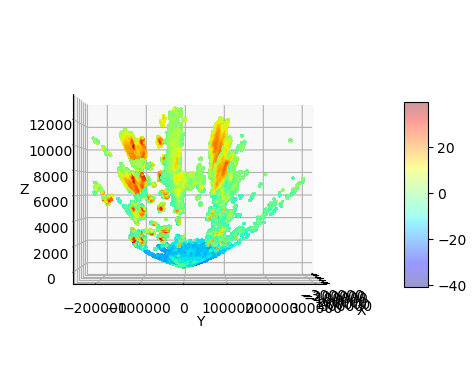

In [31]:
# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(len(sweep_gate_set)):
    # Plot the surface connecting the data points
    # ax.plot_trisurf(sweep_gate_set[i][:, 0], sweep_gate_set[i][:, 1], sweep_gate_set[i][:, 2], cmap='binary_r', linewidth=0,  , antialiased=False)
    p = ax.scatter(sweep_gate_set[i][:, 0], sweep_gate_set[i][:, 1], sweep_gate_set[i][:, 2], c=reflectivities[i], cmap='jet', marker='o', edgecolors='face',alpha=0.4, s=1)

# Set labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
fig.colorbar(p, shrink=0.5, aspect=8)


# Set the initial view angle
ax.view_init(elev=0, azim=0)

# Function to update the plot during animation
def update(frame):
    
    ax.view_init(0, frame*2)
    
    for i in range(len(sweep_gate_set)):
    # Plot the surface connecting the data points
    # ax.plot_trisurf(sweep_gate_set[i][:, 0], sweep_gate_set[i][:, 1], sweep_gate_set[i][:, 2], cmap='binary_r', linewidth=0,  , antialiased=False)
        p = ax.scatter(sweep_gate_set[i][:, 0], sweep_gate_set[i][:, 1], sweep_gate_set[i][:, 2], c=reflectivities[i], cmap='jet', marker='o', edgecolors='face',alpha=0.4, s=1)


# Create the animation
animation = FuncAnimation(fig, update, frames=np.arange(0, 90), interval=200)

# Save the animation as a GIF file
animation.save('3d_reflectivities.gif', writer=PillowWriter(fps=30))

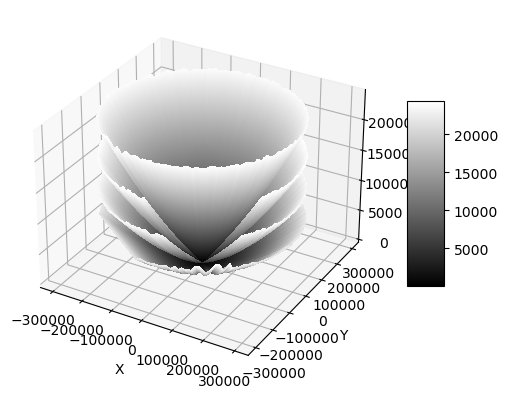

In [25]:
# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(len(sweep_gate_set)):
    # Plot the surface connecting the data points
    surface = ax.plot_trisurf(sweep_gate_set[i][:, 0], sweep_gate_set[i][:, 1], sweep_gate_set[i][:, 2], cmap='binary_r', linewidth=0, antialiased=False)

# Set labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
fig.colorbar(surface, shrink=0.5, aspect=5)
# Show the plot
plt.show() 

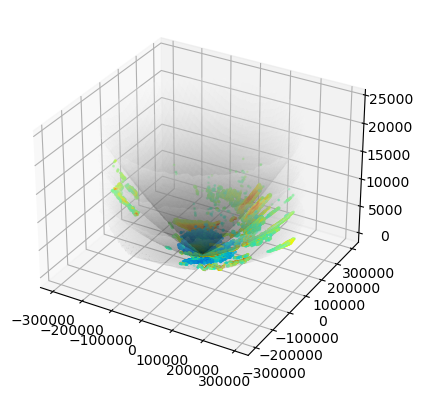

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata


# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(len(sweep_gate_set)):
    # Separate points into X, Y, and Z arrays
    X = sweep_gate_set[i][:, 0]
    Y = sweep_gate_set[i][:, 1]
    Z = sweep_gate_set[i][:, 2]

    # Create a meshgrid from X and Y
    x_range = np.linspace(min(X), max(X), 100)
    y_range = np.linspace(min(Y), max(Y), 100)
    x_grid, y_grid = np.meshgrid(x_range, y_range)

    # Interpolate Z values on the grid
    z_grid = griddata((X, Y), Z, (x_grid, y_grid), method='cubic')

    # Plot the surface
    surface = ax.plot_surface(x_grid, y_grid, z_grid, cmap='binary_r', alpha=0.2)
    ax.scatter(X, Y, Z, c=reflectivities[i], cmap='jet', marker='o', edgecolors='face',alpha=0.4, s=1)
    

# Show the plot
plt.show()
